<a href="https://colab.research.google.com/github/LucasSSales/Lista01-Visao-Computacional/blob/main/Lista01_VC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#imagens do exercicio
img01 = cv.imread(cv.samples.findFile("first_frame.jpg"))
img02 = cv.imread(cv.samples.findFile("second_frame.jpg"))
#imagens a serem usadas
maki = cv.imread(cv.samples.findFile("maki.jpg"))
eu = cv.imread(cv.samples.findFile("eu.jpg") )
otoya = cv.imread(cv.samples.findFile("otoya.jpg") )
maki1024 = cv.imread(cv.samples.findFile("Maki1024.jpg"))
#noise_img = cv.imread(cv.samples.findFile("noise_img.jpg") )
sp_noise = cv.imread(cv.samples.findFile("sp_noise.jpg"), flags = cv.IMREAD_GRAYSCALE)
gaussian_noise = cv.imread(cv.samples.findFile("gaussian_noise.jpg"), flags = cv.IMREAD_GRAYSCALE)
maki_gray = cv.imread(cv.samples.findFile("sp_noise.jpg"), flags = cv.IMREAD_GRAYSCALE )
#gray scales
maki_gs = cv.imread(cv.samples.findFile("maki.jpg"), flags = cv.IMREAD_GRAYSCALE )
eu_gs = cv.imread(cv.samples.findFile("eu.jpg"), flags = cv.IMREAD_GRAYSCALE )
otoya_gs = cv.imread(cv.samples.findFile("otoya.jpg"), flags = cv.IMREAD_GRAYSCALE )
maki1024_gs = cv.imread(cv.samples.findFile("Maki1024.jpg"), flags = cv.IMREAD_GRAYSCALE )
maki256_gs = cv.imread(cv.samples.findFile("maki256.jpg"), flags = cv.IMREAD_GRAYSCALE )
img01_gs = cv.imread(cv.samples.findFile("first_frame.jpg"), flags = cv.IMREAD_GRAYSCALE )
img02_gs = cv.imread(cv.samples.findFile("second_frame.jpg"), flags = cv.IMREAD_GRAYSCALE )

# QUESTÃO 01

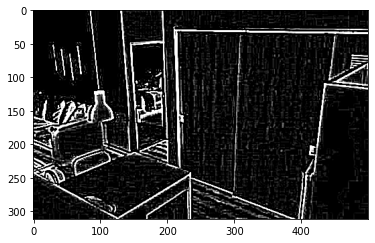

In [22]:
#print(maki[0].T)
t1 = cv.Laplacian(img01_gs, -1, ksize=5)
plt.imshow(cv.cvtColor(t1, cv.COLOR_BGR2RGB))

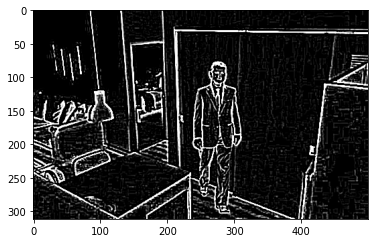

In [23]:
img02_rszd = cv.resize(img02_gs, (img01.shape[1], img01.shape[0]))
t2 = cv.Laplacian(img02_rszd, -1, ksize=5)
plt.imshow(cv.cvtColor(t2, cv.COLOR_BGR2RGB))

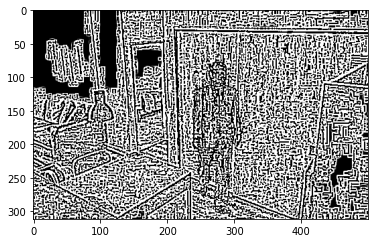

In [24]:
t3 = cv.Laplacian(t2-(t1-t2), -1, ksize=5)
plt.imshow(cv.cvtColor(t3, cv.COLOR_BGR2RGB))

IDEIAS:

percorrer o rgb e achar discrepancias altas entre os tons de cores, salvar essa zona em uma imagem a parte

passar um filtro de arestas em ambas as imagens, subtrair a 01 da 02 e ver a regiao que sobra -> nao deu

# QUESTÃO 02

In [ ]:
3,4,5,6,7 -> na mao

vai fik ruido

5,6,7 -> pode ser 4

8 -> 

# QUESTÃO 03

In [109]:
#pega a submatriz da img para calcular
def submatrix(m, l0, l1, c0, c1):
  if (l0 < 0): l0 = 0
  if (c0 < 0): c0 = 0
  if (l1 >= len(m)): l1 = len(m)-1
  if (c1 >= len(m[0])): c1 = len(m[0])-1
  sub = []
  for i in range(len(m)):
    if (l0 <= i and l1 >= i):
      sub.append(m[i][c0:c1+1])
  return np.array(sub)

def evaluated_s(s):
  #print(s)
  for i in range(len(s)):
    if (s[i] > 255): s[i] = 255
    if (s[i] < 0): s[i] = 0
  #print(s)
  if (len(s)==1):
    return s[0]
  return s

#calcula o valor para o pixel do meio
def calc_mid_pxl(subm, kernel, convolution = False, isRGB = False):
  if (convolution): np.flip(kernel)
  s = 0
  for i in range(len(kernel)):
    s += np.dot(kernel[i], subm[i].T)

  if (np.isscalar(s)):
    s = [s]
  s = evaluated_s(np.array(s))
  return s



def calc_mid_pxl_xtrm(subm, kernel, convolution = False, isRGB = False):
  if (convolution): np.flip(kernel)
  s = 0
  for i in range(len(kernel)):
    s += np.dot(kernel[i], subm[i].T)

  if (s > 30): s = 255
  else: s = 0
  # if (np.isscalar(s)):
  #   s = [s]
  # s = evaluated_s(np.array(s))
  return s

#função principal para aplicar o kernel
def applyFilter(img, kernel, isMedian = False, convolution = False):
  new_img = img * 0
  k_dim = len(kernel)
  for i in range(len(img)):
    l0 = i - (k_dim//2)
    if (l0 < 0): continue
    l1 = i + (k_dim//2)
    if (l1 > len(img)-1): continue
    for j in range(len(img[i])):
      c0 = j - (k_dim//2)
      if (c0 < 0): continue
      c1 = j + (k_dim//2)
      if (c1 > len(img[i])-1): continue
      if (isMedian):
        new_img[i][j] = np.median(submatrix(img, l0, l1, c0, c1))
      else:
        new_img[i][j] = calc_mid_pxl(submatrix(img, l0, l1, c0, c1), kernel, convolution)
        
  return new_img

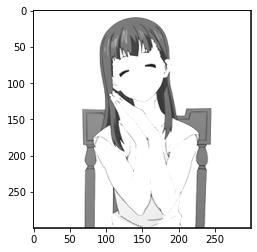

In [110]:
q03_img = maki_gs

def my_filter(dim, kernel):
  try:
    new_kernel = np.zeros((dim, dim), np.uint) + kernel
    return applyFilter(q03_img, new_kernel)
    #return cv.filter2D(src = q03_img, ddepth = -1, kernel = new_kernel, borderType=cv.BORDER_REPLICATE )
  except:
    return None

n, kernel = 3, [ [0, 0, 0], [0, 0.5, 0], [0, 1, 0.5] ]
resp = my_filter(n, kernel)
plt.imshow(cv.cvtColor(resp, cv.COLOR_BGR2RGB))

In [ ]:
n, kernel = 3, [ [0, 0, 0], [0, 0.5, 0], [0, 1, 0.5] ]
resp = my_filter(n, kernel)
plt.imshow(cv.cvtColor(resp, cv.COLOR_BGR2RGB))
print(submatrix(resp, 0, 5, 0, 5))

In [281]:
h = np.array([ [1,2,3] , [4,5,6], [7,8,9], [10,11,12]])
h.T[0]
f = h * 0
t = np.array(4)
np.isscalar(h[0][0])

True

# QUESTÃO 04

### MEDIAN BLUR
Esse filtro, diferente da maioria, não calcula um novo valor para o pixel central, apenas se utiliza da mediana dos valores encontrados dentro da matriz e substitui o valor central pela mediana desse conjunto, ela é bastante efetiva para remoção de ruídos do tipo "Salt and Pepper"

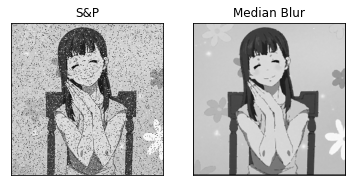

In [117]:
#Minha implementação
median_img = applyFilter(sp_noise, np.array((3,3)), True)
plt.subplot(121),plt.imshow(cv.cvtColor(sp_noise, cv.COLOR_BGR2RGB)),plt.title('S&P')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv.cvtColor(median_img, cv.COLOR_BGR2RGB)),plt.title('Median Blur')
plt.xticks([]), plt.yticks([])
plt.show()

### GAUSSIAN BLUR
Esse filtro utiliza a função Guassiana, que é uma distribuição normal, para avaliar os pixels e deixa um tom mais "desfocado", serve melhor para remoção de ruídos do tipo "Gaussiano", ou seja, que seguem uma distribuição normal

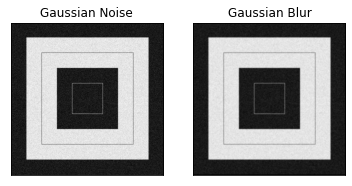

In [115]:
#Minha implementação
gauss_kernel = np.array([[1,4,7,4,1], [4,16,26,16,4], [7,26,41,26,7], [4,16,26,16,4], [1,4,7,4,1]])*(1/273)
gauss_img = applyFilter(gaussian_noise, gauss_kernel, convolution = True)
plt.subplot(121),plt.imshow(cv.cvtColor(gaussian_noise, cv.COLOR_BGR2RGB)),plt.title('Gaussian Noise')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv.cvtColor(gauss_img, cv.COLOR_BGR2RGB)),plt.title('Gaussian Blur')
plt.xticks([]), plt.yticks([])
plt.show()

# QUESTÃO 05

In [319]:
#QUESTÃO 05
#O KERNEL UTILIZADO SERÁ:
#|-1 -1 -1|
#|-1  9 -1|
#|-1 -1 -1|

#definindo n
n = 3
#gerando o kernel
hpkernel = np.ones((n,n))*(-1)
mid = ((n*n))
hpkernel[n//2][n//2] = hpkernel[n//2][n//2]*(-mid)
#hpkernel /= (n*n)
hpkernel

array([[-1., -1., -1.],
       [-1.,  9., -1.],
       [-1., -1., -1.]])

PLOT DA IMAGEM 01


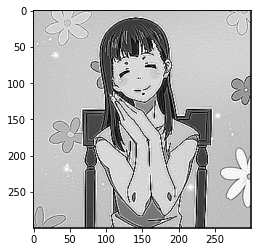

In [314]:
#plotando a imagem 01
#dst = cv.filter2D(src = maki_gs, ddepth = -1, kernel = hpkernel, borderType=cv.BORDER_REPLICATE )
dst = applyFilter(maki_gs, hpkernel)
print("PLOT DA IMAGEM 01")
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))

PLOT DA IMAGEM 02


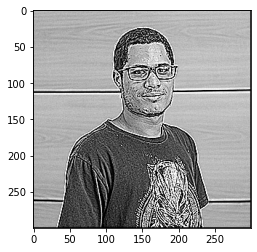

In [315]:
#plotando a imagem 02
#dst = cv.filter2D(src = eu, ddepth = -1, kernel = hpkernel, borderType=cv.BORDER_REPLICATE )
dst = applyFilter(eu_gs, hpkernel)
print("PLOT DA IMAGEM 02")
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))

PLOT DA IMAGEM 03


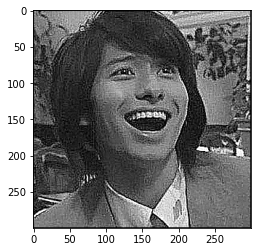

In [316]:
#plotando a imagem 03
#dst = cv.filter2D(src = otoya, ddepth = -1, kernel = hpkernel, borderType=cv.BORDER_REPLICATE )
dst = applyFilter(otoya_gs, hpkernel)
print("PLOT DA IMAGEM 03")
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))

In [320]:
#acrescendo 3 em n
n = n + 4
hpkernel = np.ones((n,n))*(-1)
mid = ((n*n))
hpkernel[n//2][n//2] = hpkernel[n//2][n//2]*(-mid)
#hpkernel /= (n*n)
hpkernel

array([[-1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., 49., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1.]])

PLOT DA IMAGEM 01


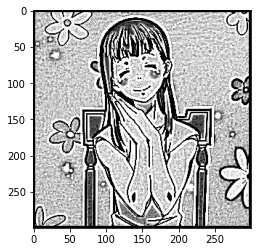

In [321]:
#plotando a imagem 01
#dst = cv.filter2D(src = maki, ddepth = -1, kernel = hpkernel, borderType=cv.BORDER_REPLICATE )
dst = applyFilter(maki_gs, hpkernel)
print("PLOT DA IMAGEM 01")
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))

PLOT DA IMAGEM 02


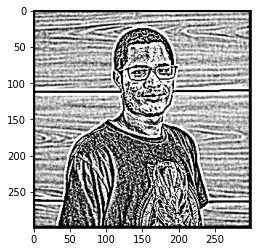

In [322]:
#plotando a imagem 02
#dst = cv.filter2D(src = eu, ddepth = -1, kernel = hpkernel, borderType=cv.BORDER_REPLICATE )
dst = applyFilter(eu_gs, hpkernel)
print("PLOT DA IMAGEM 02")
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))

PLOT DA IMAGEM 03


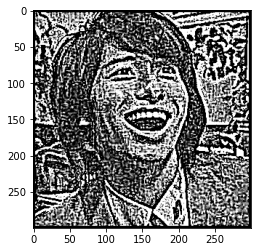

In [323]:
#plotando a imagem 03
#dst = cv.filter2D(src = otoya, ddepth = -1, kernel = hpkernel, borderType=cv.BORDER_REPLICATE )
dst = applyFilter(otoya_gs, hpkernel)
print("PLOT DA IMAGEM 03")
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))

Percebe-se que ao aumentar p valor de n, o efeito de sharpening vai aumentando

# QUESTÃO 06

In [328]:
#QUESTÃO 06
#O KERNEL UTILIZADO SERÁ O MEAN:
#|1 1 1|
#|1 1 1| *(1/9)
#|1 1 1|

n = 3
meanKernel = np.ones((n,n), dtype=np.float32)
meanKernel /= (n*n)
meanKernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]], dtype=float32)

PLOT DA IMAGEM 01


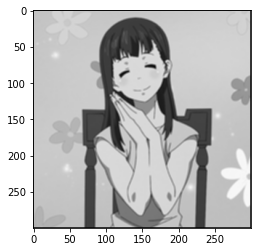

In [325]:
#plotando a imagem 01
#dst = cv.filter2D(src = maki, ddepth = -1, kernel = meanKernel, borderType=cv.BORDER_REPLICATE )
dst = applyFilter(maki_gs, meanKernel)
print("PLOT DA IMAGEM 01")
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))

PLOT DA IMAGEM 02


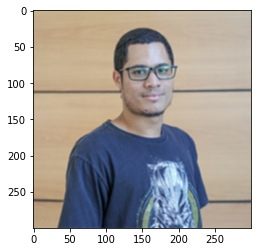

In [ ]:
#plotando a imagem 02
dst = cv.filter2D(src = eu, ddepth = -1, kernel = meanKernel, borderType=cv.BORDER_REPLICATE )
print("PLOT DA IMAGEM 02")
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))

PLOT DA IMAGEM 03


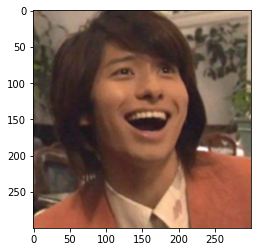

In [ ]:
#plotando a imagem 03
dst = cv.filter2D(src = otoya, ddepth = -1, kernel = meanKernel, borderType=cv.BORDER_REPLICATE )
print("PLOT DA IMAGEM 03")
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))

In [329]:
#acrescendo em 3 o valor de n
n = n + 4
meanKernel = np.ones((n,n),dtype=np.float32)
meanKernel /= (n*n)
meanKernel

array([[0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816]], dtype=float32)

PLOT DA IMAGEM 01


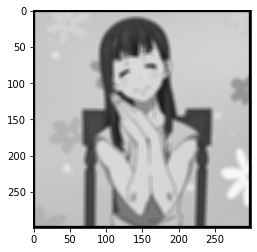

In [330]:
#plotando a imagem 01
#dst = cv.filter2D(src = maki, ddepth = -1, kernel = meanKernel, borderType=cv.BORDER_REPLICATE )
dst = applyFilter(maki_gs, meanKernel)
print("PLOT DA IMAGEM 01")
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))

PLOT DA IMAGEM 02


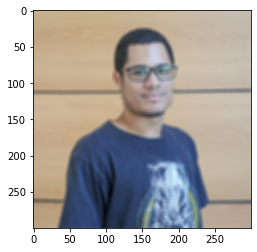

In [ ]:
#plotando a imagem 02
dst = cv.filter2D(src = eu, ddepth = -1, kernel = meanKernel, borderType=cv.BORDER_REPLICATE )
print("PLOT DA IMAGEM 02")
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))

PLOT DA IMAGEM 03


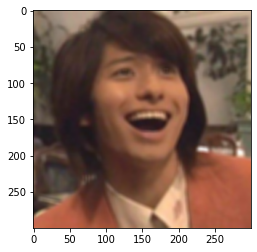

In [ ]:
#plotando a imagem 03
dst = cv.filter2D(src = otoya, ddepth = -1, kernel = meanKernel, borderType=cv.BORDER_REPLICATE )
print("PLOT DA IMAGEM 03")
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))

Ao aumentar o valor de n, o efeito de smoothing aumenta


# QUESTÃO 07

In [ ]:
# QUESTÃO 07
#O KERNEL UTILIZADO SERÁ O OPERADOR DE SOBEL:
#|-1  0  1|      |-1 -2 -1|
#|-2  0  2| gx   | 0  0  0| gy
#|-1  0  1|      | 1  2  1|

gx = np.array([ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1] ])
gy = np.array([ [-1, -2, -1], [0, 0, 0], [1, 2, 1] ])

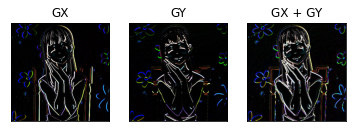

In [ ]:
#plotando a imagem 01
dstx = cv.filter2D(src = maki, ddepth = -1, kernel = gx, borderType=cv.BORDER_REPLICATE )
dsty = cv.filter2D(src = maki, ddepth = -1, kernel = gy, borderType=cv.BORDER_REPLICATE )

plt.subplot(131),plt.imshow(cv.cvtColor(dstx, cv.COLOR_BGR2RGB)),plt.title('GX')
plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(cv.cvtColor(dsty, cv.COLOR_BGR2RGB)),plt.title('GY')
plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(cv.cvtColor(dstx+dsty, cv.COLOR_BGR2RGB)),plt.title('GX + GY')
plt.xticks([]), plt.yticks([])
plt.show()

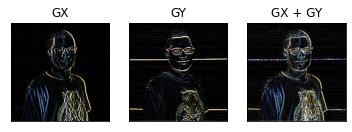

In [ ]:
#plotando a imagem 02
dstx = cv.filter2D(src = eu, ddepth = -1, kernel = gx, borderType=cv.BORDER_REPLICATE )
dsty = cv.filter2D(src = eu, ddepth = -1, kernel = gy, borderType=cv.BORDER_REPLICATE )

plt.subplot(131),plt.imshow(cv.cvtColor(dstx, cv.COLOR_BGR2RGB)),plt.title('GX')
plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(cv.cvtColor(dsty, cv.COLOR_BGR2RGB)),plt.title('GY')
plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(cv.cvtColor(dstx+dsty, cv.COLOR_BGR2RGB)),plt.title('GX + GY')
plt.xticks([]), plt.yticks([])
plt.show()

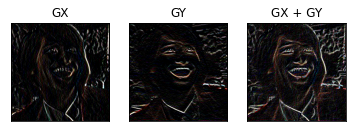

In [ ]:
#plotando a imagem 03
dstx = cv.filter2D(src = otoya, ddepth = -1, kernel = gx, borderType=cv.BORDER_REPLICATE )
dsty = cv.filter2D(src = otoya, ddepth = -1, kernel = gy, borderType=cv.BORDER_REPLICATE )

plt.subplot(131),plt.imshow(cv.cvtColor(dstx, cv.COLOR_BGR2RGB)),plt.title('GX')
plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(cv.cvtColor(dsty, cv.COLOR_BGR2RGB)),plt.title('GY')
plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(cv.cvtColor(dstx+dsty, cv.COLOR_BGR2RGB)),plt.title('GX + GY')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
#acrescendo 3
gx2 = np.array([ [-1, 0, 0, 0, 0, 1], [-2, 0, 0, 0, 0, 2], [-3, 0, 0, 0, 0, 3], [-3, 0, 0, 0, 0, 3], [-2, 0, 0, 0, 0, 2], [-1, 0, 0, 0, 0, 1] ])
gy2 = np.array([ [-1, -2, -3, -3, -2 -1], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [1, 2, 3, 3, 2, 1] ])

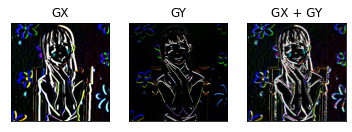

In [ ]:
#plotando a imagem 01
dstx = cv.filter2D(src = maki, ddepth = -1, kernel = gx2, borderType=cv.BORDER_REPLICATE )
dsty = cv.filter2D(src = maki, ddepth = -1, kernel = gy2, borderType=cv.BORDER_REPLICATE )

plt.subplot(131),plt.imshow(cv.cvtColor(dstx, cv.COLOR_BGR2RGB)),plt.title('GX')
plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(cv.cvtColor(dsty, cv.COLOR_BGR2RGB)),plt.title('GY')
plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(cv.cvtColor(dstx+dsty, cv.COLOR_BGR2RGB)),plt.title('GX + GY')
plt.xticks([]), plt.yticks([])
plt.show()

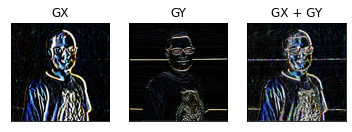

In [ ]:
#plotando a imagem 02
dstx = cv.filter2D(src = eu, ddepth = -1, kernel = gx2, borderType=cv.BORDER_REPLICATE )
dsty = cv.filter2D(src = eu, ddepth = -1, kernel = gy2, borderType=cv.BORDER_REPLICATE )

plt.subplot(131),plt.imshow(cv.cvtColor(dstx, cv.COLOR_BGR2RGB)),plt.title('GX')
plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(cv.cvtColor(dsty, cv.COLOR_BGR2RGB)),plt.title('GY')
plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(cv.cvtColor(dstx+dsty, cv.COLOR_BGR2RGB)),plt.title('GX + GY')
plt.xticks([]), plt.yticks([])
plt.show()

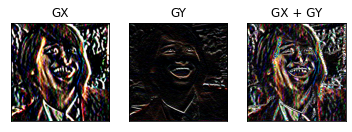

In [ ]:
#plotando a imagem 03
dstx = cv.filter2D(src = otoya, ddepth = -1, kernel = gx2, borderType=cv.BORDER_REPLICATE )
dsty = cv.filter2D(src = otoya, ddepth = -1, kernel = gy2, borderType=cv.BORDER_REPLICATE )

plt.subplot(131),plt.imshow(cv.cvtColor(dstx, cv.COLOR_BGR2RGB)),plt.title('GX')
plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(cv.cvtColor(dsty, cv.COLOR_BGR2RGB)),plt.title('GY')
plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(cv.cvtColor(dstx+dsty, cv.COLOR_BGR2RGB)),plt.title('GX + GY')
plt.xticks([]), plt.yticks([])
plt.show()

Quando o n aumenta, mais edges ele consegue captar

# QUESTÃO 08

In [ ]:
#QUESTÃO 08
#Os filtros serão os mesmos utilizados nas questões 05 e 06

def create_hybrid_img(img, high_freq, low_freq):
  if (high_freq == 0 or low_freq == 0):
    return img
    
  #creating the high-pass kernel
  hp_kernel = np.ones((high_freq,high_freq))*(-1)
  mid = (high_freq*high_freq)
  hp_kernel[high_freq//2][high_freq//2] = hp_kernel[high_freq//2][high_freq//2]*(-mid)

  #creating the low-pass kernel
  mean_kernel = np.ones((low_freq,low_freq))
  mean_kernel /= (low_freq*low_freq)

  #creating the high-pass version of the image
  high_ver = cv.filter2D(src = img, ddepth = -1, kernel = hp_kernel, borderType=cv.BORDER_REPLICATE )
  #creating the low-pass version of the image
  low_ver = cv.filter2D(src = img, ddepth = -1, kernel = mean_kernel, borderType=cv.BORDER_REPLICATE )

  return high_ver + low_ver

PLOT DA IMAGEM 01


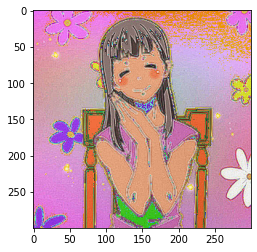

In [ ]:
#plotando a imagem 01
dst = create_hybrid_img(maki, 3, 3)
print("PLOT DA IMAGEM 01")
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))

PLOT DA IMAGEM 02


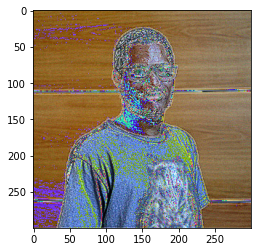

In [ ]:
dst = create_hybrid_img(eu, 3, 3)
print("PLOT DA IMAGEM 02")
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))

PLOT DA IMAGEM 03


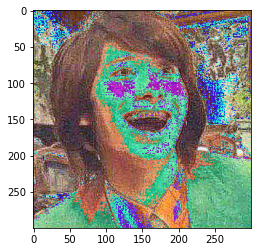

In [ ]:
#plotando a imagem 03
dst = create_hybrid_img(otoya, 3, 3)
print("PLOT DA IMAGEM 03")
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))

PLOT DA IMAGEM 01


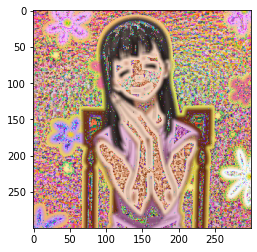

In [ ]:
#plotando a imagem 01
dst = create_hybrid_img(maki, 9, 5)
print("PLOT DA IMAGEM 01")
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))

PLOT DA IMAGEM 02


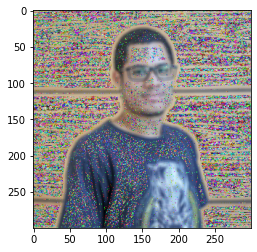

In [ ]:
#plotando a imagem 01
dst = create_hybrid_img(eu, 9, 5)
print("PLOT DA IMAGEM 02")
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))

PLOT DA IMAGEM 03


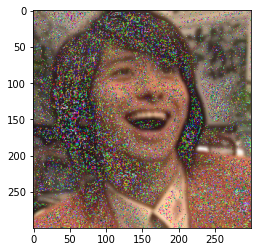

In [ ]:
#plotando a imagem 03
dst = create_hybrid_img(otoya, 9, 5)
print("PLOT DA IMAGEM 03")
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))

PLOT DA IMAGEM 01


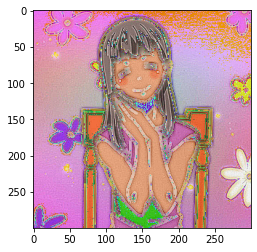

In [ ]:
#plotando a imagem 01
dst = create_hybrid_img(maki, 3, 11)
print("PLOT DA IMAGEM 01")
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))

PLOT DA IMAGEM 02


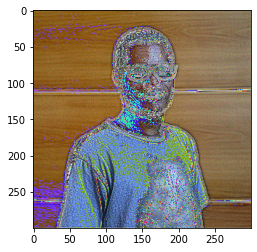

In [ ]:
#plotando a imagem 01
dst = create_hybrid_img(eu, 3, 11)
print("PLOT DA IMAGEM 02")
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))

PLOT DA IMAGEM 03


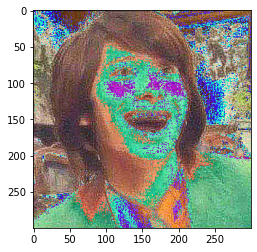

In [ ]:
#plotando a imagem 03
dst = create_hybrid_img(otoya, 3, 11)
print("PLOT DA IMAGEM 03")
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))

# QUESTÃO 09

imagem gerada


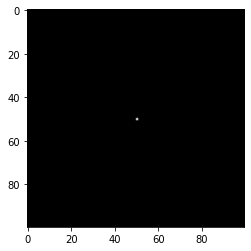

In [ ]:
gauss_kernel = np.array([[1,4,7,4,1], [4,16,26,16,4], [7,26,41,26,7], [4,16,26,16,4], [1,4,7,4,1]])*(1/273)

#gerando imagem preta com 1 pixel branco no meio
white_pixel = np.zeros((100,100), np.uint8)
white_pixel[50][50] = 255
print("imagem gerada")
plt.imshow(cv.cvtColor(white_pixel, cv.COLOR_BGR2RGB))

Como os valores da imagem são, em sua maioridade, 0, em praticamente todos os pontos, a gaussiana resultará em 0, tanto na convolução quanto na cross-correlation, na grande parte das areas, por isso será calculado apenas os valores quando o pixel branco estiver aparecendo na matriz, porém há algumas coisas a serem analisadas:


*   A matriz da Gaussiana é simetrica, então apenas as ocorrências do pixel branco serao analisadas, pois serão as mesmas para a coordenada simetrica do outro lado da diagonal;
*   Quando o valor de um campo com valor X em g for calculado, em todas as ocorrrencias dele em g, será o mesmo valor;
*   A matriz se for flipada para a convolução, continuará a mesma, então a correlação cruzada de g com I e a convolução g * I resultarão nos mesmos valores;
*   Como a convolução é comutativa, g*I será o mesmo que I*g.

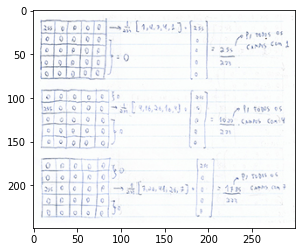

In [ ]:
q91 = cv.imread(cv.samples.findFile("vc lista 01.jpg") )
plt.imshow(cv.cvtColor(q91, cv.COLOR_BGR2RGB))

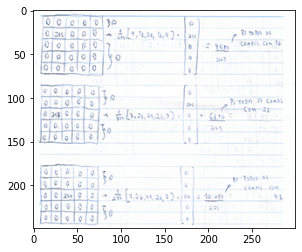

In [ ]:
q92 = cv.imread(cv.samples.findFile("vc lista 02.jpg") )
plt.imshow(cv.cvtColor(q92, cv.COLOR_BGR2RGB))

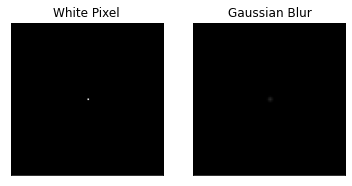

6552


In [ ]:
gauss_img = applyFilter(white_pixel, gauss_kernel, convolution = True)
plt.subplot(121),plt.imshow(cv.cvtColor(white_pixel, cv.COLOR_BGR2RGB)),plt.title('White Pixel')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv.cvtColor(gauss_img, cv.COLOR_BGR2RGB)),plt.title('Gaussian Blur')
plt.xticks([]), plt.yticks([])
plt.show()

# QUESTÃO 10

In [ ]:
def my_resize(img, sx, sy, gauss=True):
  new_img = img
  if (gauss):
    gauss_kernel = np.array([[1,4,7,4,1], [4,16,26,16,4], [7,26,41,26,7], [4,16,26,16,4], [1,4,7,4,1]])*(1/273)
    new_img = applyFilter(img, gauss_kernel, convolution = True)
  w, h = new_img.shape[1]*(sx/100), new_img.shape[0]*(sy/100)
  return cv.resize(new_img, (int(w),int(h) ))  

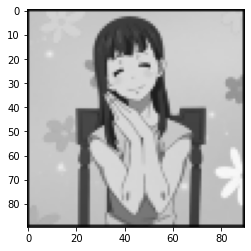

In [ ]:
resized = my_resize(maki_gs, 30, 30)
plt.imshow(cv.cvtColor(resized, cv.COLOR_BGR2RGB))

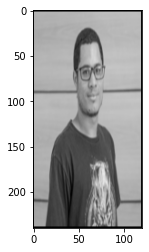

In [ ]:
resized = my_resize(eu_gs, 40, 80)
plt.imshow(cv.cvtColor(resized, cv.COLOR_BGR2RGB))

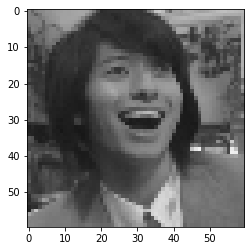

In [ ]:
resized = my_resize(otoya_gs, 20, 20)
plt.imshow(cv.cvtColor(resized, cv.COLOR_BGR2RGB))

# QUESTÃO 11

In [45]:
gauss_kernel = np.array([[1,4,7,4,1], [4,16,26,16,4], [7,26,41,26,7], [4,16,26,16,4], [1,4,7,4,1]])*(1/273)

def reduce_half_img(img):
  new_img = img
  halfed, h_idx = [], -1
  for i in range(len(new_img)):
    if (i%2!=0): continue
    halfed.append([])
    h_idx += 1
    for j in range(len(new_img[i])):
      if (j%2!=0): continue
      halfed[h_idx].append(new_img[i][j])
  return np.array(halfed, np.uint8)

def build_pyramid(img, gauss=True):
  img_l, img_c = img.shape[0], img.shape[1]
  pyramid = np.zeros(( img_l, img_c + (img_c//2)), np.uint8)
  down = 0
  #adicionando a versao original
  for i in range(len(img)):
    for j in range(len(img[i])):
      pyramid[i][j] = img[i][j]
  new_img = img
  #enqnt nao for apenas 1 pixel
  while new_img.shape[0] != 1:
    if (gauss):
      new_img = applyFilter(new_img, gauss_kernel, convolution = True)
    new_img = reduce_half_img(new_img)
    for i in range(len(new_img)):
      for j in range(len(new_img[i])):
        pyramid[i+down][j+img_c] = new_img[i][j]
    down += new_img.shape[0]
  return pyramid

True

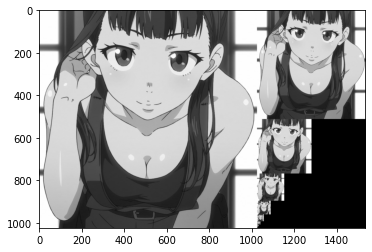

In [46]:
pyramid = build_pyramid(maki1024_gs, False)
plt.imshow(cv.cvtColor(pyramid, cv.COLOR_BGR2RGB))
cv.imwrite("pyramid.jpg", pyramid)

True

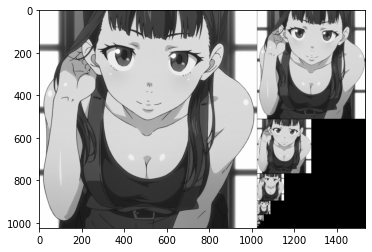

In [49]:
gauss_pyramid = build_pyramid(maki1024_gs)
plt.imshow(cv.cvtColor(gauss_pyramid, cv.COLOR_BGR2RGB))
cv.imwrite("gauss_pyramid.jpg", gauss_pyramid)

# QUESTÃO 12

In [345]:
#filtros de derivada

#O KERNEL UTILIZADO SERÁ O LAPACIAN:
#|-1 -1 -1|
#|-1  8 -1|
#|-1 -1 -1|

n = 3
lap_kernel = np.ones((n,n))*(-1)
mid = ((n*n)-1)
lap_kernel[n//2][n//2] = lap_kernel[n//2][n//2]*(-mid)

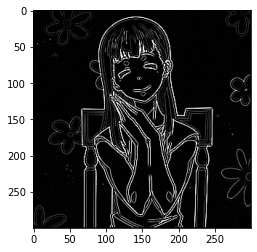

In [346]:
lap = applyFilter(maki_gs, lap_kernel)
plt.imshow(cv.cvtColor(lap, cv.COLOR_BGR2RGB))

In [347]:
#SOBEL OPERATOR:
#|-1  0  1|      |-1 -2 -1|
#|-2  0  2| gx   | 0  0  0| gy
#|-1  0  1|      | 1  2  1|

gx = np.array([ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1] ])
gy = np.array([ [-1, -2, -1], [0, 0, 0], [1, 2, 1] ])

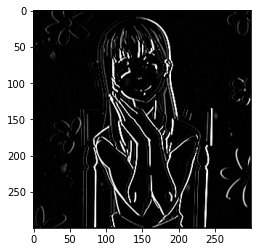

In [349]:
#PARA X
dstx = applyFilter(maki_gs, gx)
plt.imshow(cv.cvtColor(dstx, cv.COLOR_BGR2RGB))

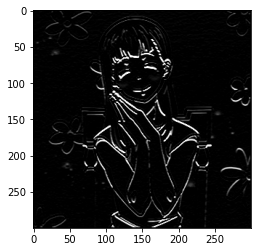

In [350]:
#PARA Y
dsty = applyFilter(maki_gs, gy)
plt.imshow(cv.cvtColor(dsty, cv.COLOR_BGR2RGB))

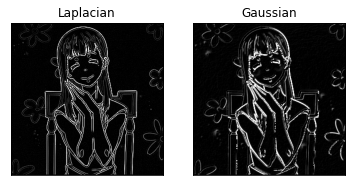

In [351]:
plt.subplot(121),plt.imshow(cv.cvtColor(lap, cv.COLOR_BGR2RGB)),plt.title('Laplacian')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(cv.cvtColor(dstx+dsty, cv.COLOR_BGR2RGB)),plt.title('Gaussian')
plt.xticks([]), plt.yticks([])
plt.show()

A versão com gaussiana se mostra mais suavizada, enquanto a versão laplaciana foca melhor nas linhas e parece menos "fofo" nas arestas

# QUESTÃO 13

Referencias
Filtros: https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html

https://docs.opencv.org/master/d4/dbd/tutorial_filter_2d.html

https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html
